<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/HM_Categorical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Categorical Data: Understanding and Handling

Categorical data represents characteristics or qualities that can be divided into groups or categories. These categories can be nominal (no inherent order) or ordinal (have a meaningful order). Unlike numerical data, categorical data cannot be measured on a numerical scale.

### Types of Categorical Data

1.  **Nominal Data:** Categories without any intrinsic order or ranking.
    *   **Examples:** Gender (Male, Female, Non-binary), Marital Status (Single, Married, Divorced), Color (Red, Blue, Green), City (New York, London, Paris).

2.  **Ordinal Data:** Categories with a clear, meaningful order or ranking.
    *   **Examples:** Education Level (High School, Bachelor's, Master's, PhD), Customer Satisfaction (Very Unsatisfied, Unsatisfied, Neutral, Satisfied, Very Satisfied), T-shirt Size (Small, Medium, Large, XL).

### Why Handle Categorical Data?

Most machine learning algorithms are designed to work with numerical input. Feeding raw categorical data directly to these models can lead to errors or incorrect interpretations. Therefore, it's crucial to convert categorical data into a numerical format that models can understand and process effectively.

### Common Techniques for Handling Categorical Data

Here are some of the most common techniques:

1.  **One-Hot Encoding:**
    *   **Concept:** Creates new binary columns (dummy variables) for each unique category in a feature. If a data point belongs to a category, its corresponding new column gets a value of 1, and 0 otherwise.
    *   **Use Case:** Best for nominal categorical data where there is no inherent order. It prevents the model from assuming an arbitrary order that doesn't exist.
    *   **Considerations:** Can lead to a high-dimensional dataset (curse of dimensionality) if there are many unique categories, especially in features with high cardinality.

2.  **Label Encoding:**
    *   **Concept:** Assigns a unique integer to each category based on alphabetical order or the order in which they appear. For example, 'Red' might be 0, 'Blue' 1, 'Green' 2.
    *   **Use Case:** Suitable for ordinal categorical data where the numerical order can convey the underlying ranking. It's also used for nominal data if the number of categories is very high, or when the model can handle arbitrary numerical orders (e.g., tree-based models).
    *   **Considerations:** For nominal data, label encoding can mislead models into assuming an arbitrary ordinal relationship between categories, which can negatively impact performance.

3.  **Ordinal Encoding:**
    *   **Concept:** Similar to Label Encoding, but it allows you to explicitly define the order of the categories by assigning integers according to that specific order.
    *   **Use Case:** Primarily for ordinal categorical data where the order is known and important (e.g., 'Low' = 0, 'Medium' = 1, 'High' = 2).
    *   **Considerations:** Requires manual mapping if the order is not implicit or alphabetical. If the order is incorrect, it can introduce bias.

4.  **Target Encoding (Mean Encoding):**
    *   **Concept:** Replaces each category with the mean of the target variable for that category. For example, if 'City A' has an average house price of $300,000, then 'City A' is replaced with 300000.
    *   **Use Case:** Effective for nominal data, especially with high cardinality features, as it consolidates information into a single numerical feature.
    *   **Considerations:** Prone to overfitting, especially if categories have very few samples. It often requires regularization techniques (e.g., adding noise, smoothing) to mitigate this. It also requires access to the target variable, making it suitable for supervised learning.

5.  **Frequency/Count Encoding:**
    *   **Concept:** Replaces each category with the frequency or count of its occurrence in the dataset.
    *   **Use Case:** Useful when the frequency of a category might be predictive of the target variable. It's simple and doesn't increase dimensionality.
    *   **Considerations:** Categories with the same frequency will be encoded with the same value, potentially losing distinct information. It doesn't capture the relationship with the target variable directly.

Choosing the right encoding technique depends on the nature of your categorical data (nominal vs. ordinal), the specific machine learning algorithm you plan to use, and the cardinality of your features. Below are some code examples demonstrating these techniques using the `pandas` and `scikit-learn` libraries.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create a sample DataFrame
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Red', 'Yellow'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium', 'Small', 'Large', 'Medium'],
    'City': ['New York', 'London', 'Paris', 'New York', 'London', 'Paris', 'New York', 'London'],
    'Rating': ['Good', 'Excellent', 'Average', 'Good', 'Excellent', 'Average', 'Good', 'Poor']
}
df = pd.DataFrame(data)
display(df.head())


,Color,Size,City,Rating
0,Red,Small,New York,Good
1,Blue,Medium,London,Excellent
2,Green,Large,Paris,Average
3,Red,Small,New York,Good
4,Blue,Medium,London,Excellent


### 1. One-Hot Encoding (for Nominal Data like 'Color' or 'City')

In [ ]:
# Using pandas get_dummies
df_onehot_pd = pd.get_dummies(df, columns=['Color', 'City'], prefix=['Color', 'City'])
display(df_onehot_pd.head())

# Using sklearn OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
color_encoded = ohe.fit_transform(df[['Color']])
color_df = pd.DataFrame(color_encoded, columns=ohe.get_feature_names_out(['Color']))

city_encoded = ohe.fit_transform(df[['City']])
city_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['City']))

df_onehot_sklearn = pd.concat([df.drop(columns=['Color', 'City']), color_df, city_df], axis=1)
display(df_onehot_sklearn.head())


,Size,Rating,Color_Blue,Color_Green,Color_Red,Color_Yellow,City_London,City_New York,City_Paris
0,Small,Good,False,False,True,False,False,True,False
1,Medium,Excellent,True,False,False,False,True,False,False
2,Large,Average,False,True,False,False,False,False,True
3,Small,Good,False,False,True,False,False,True,False
4,Medium,Excellent,True,False,False,False,True,False,False


,Size,Rating,Color_Blue,Color_Green,Color_Red,Color_Yellow,City_London,City_New York,City_Paris
0,Small,Good,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Medium,Excellent,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Large,Average,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Small,Good,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Medium,Excellent,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### 2. Label Encoding (for Nominal Data or when an arbitrary order is acceptable for tree-based models)

In [ ]:
df_label = df.copy()
le = LabelEncoder()
df_label['Color_Encoded'] = le.fit_transform(df_label['Color'])
df_label['City_Encoded'] = le.fit_transform(df_label['City'])
display(df_label[['Color', 'Color_Encoded', 'City', 'City_Encoded']].head())

# You can see the mapping
print("Color mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


,Color,Color_Encoded,City,City_Encoded
0,Red,2,New York,1
1,Blue,0,London,0
2,Green,1,Paris,2
3,Red,2,New York,1
4,Blue,0,London,0


Color mapping: {'London': np.int64(0), 'New York': np.int64(1), 'Paris': np.int64(2)}


### 3. Ordinal Encoding (for Ordinal Data like 'Size' or 'Rating')

In [ ]:
df_ordinal = df.copy()

# Define the order for 'Size'
size_order = ['Small', 'Medium', 'Large']
ordinal_encoder_size = OrdinalEncoder(categories=[size_order])
df_ordinal['Size_Encoded'] = ordinal_encoder_size.fit_transform(df_ordinal[['Size']])

# Define the order for 'Rating'
rating_order = ['Poor', 'Average', 'Good', 'Excellent']
ordinal_encoder_rating = OrdinalEncoder(categories=[rating_order])
df_ordinal['Rating_Encoded'] = ordinal_encoder_rating.fit_transform(df_ordinal[['Rating']])

display(df_ordinal[['Size', 'Size_Encoded', 'Rating', 'Rating_Encoded']].head())


,Size,Size_Encoded,Rating,Rating_Encoded
0,Small,0.0,Good,2.0
1,Medium,1.0,Excellent,3.0
2,Large,2.0,Average,1.0
3,Small,0.0,Good,2.0
4,Medium,1.0,Excellent,3.0


### 4. Frequency/Count Encoding (for features like 'City' or 'Color')

In [ ]:
df_freq = df.copy()

# Get the frequency of each category in 'Color'
color_counts = df_freq['Color'].value_counts()
df_freq['Color_Freq_Encoded'] = df_freq['Color'].map(color_counts)

# Get the frequency of each category in 'City'
city_counts = df_freq['City'].value_counts()
df_freq['City_Freq_Encoded'] = df_freq['City'].map(city_counts)

display(df_freq[['Color', 'Color_Freq_Encoded', 'City', 'City_Freq_Encoded']].head())


,Color,Color_Freq_Encoded,City,City_Freq_Encoded
0,Red,3,New York,3
1,Blue,2,London,3
2,Green,2,Paris,2
3,Red,3,New York,3
4,Blue,2,London,3


### Summary

Choosing the right encoding method is crucial for model performance. Always consider the nature of your categorical data (nominal vs. ordinal), the specific machine learning algorithm you're using, and the potential impact on dimensionality and interpretability.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df=pd.read_csv('train.csv',usecols=["GarageQual","FireplaceQu","SalePrice"])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [ ]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [ ]:
df['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


Text(0.5, 1.0, 'FireplaceQu')

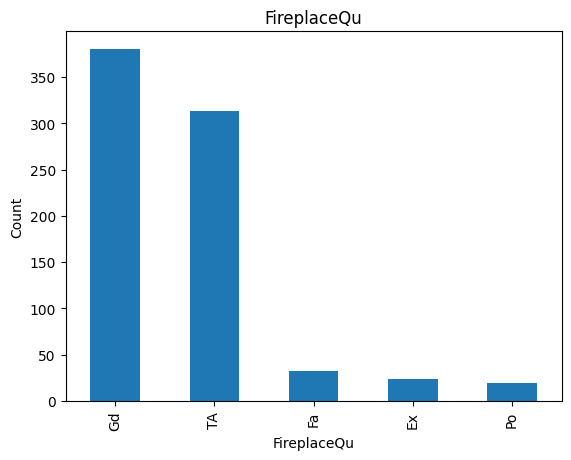

In [ ]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Count')
plt.title('FireplaceQu')

Text(0.5, 1.0, 'GarageQual')

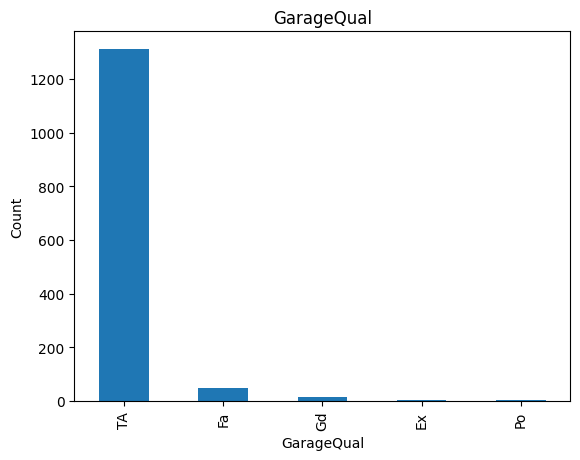

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count')
plt.title('GarageQual')

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

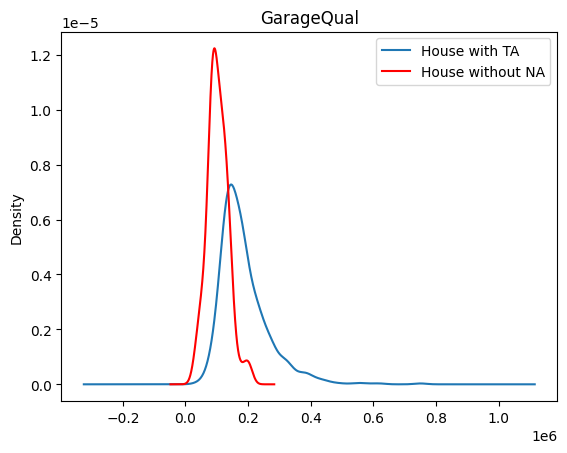

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=["House with TA","House without NA"]
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [ ]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual'].fillna('TA',inplace=True)

/tmp/ipython-input-584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

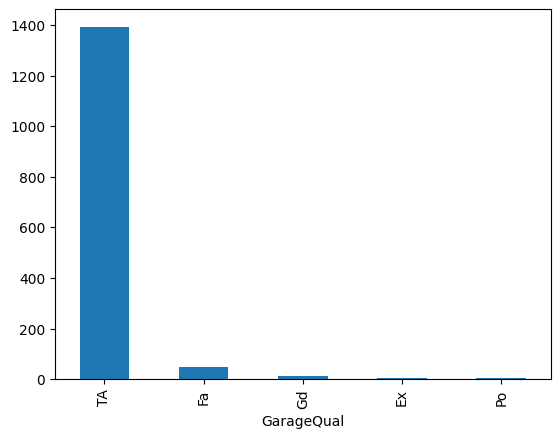

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

#Distribution of the variable after imputation

Text(0.5, 1.0, 'GarageQual')

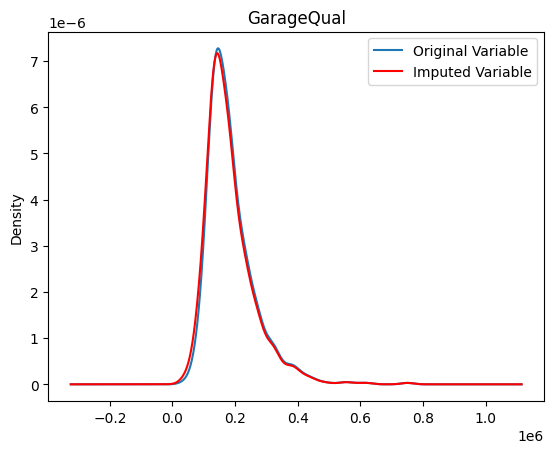

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=["Original Variable",'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

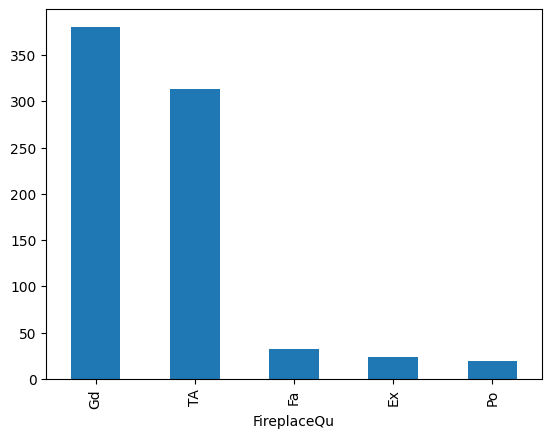

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

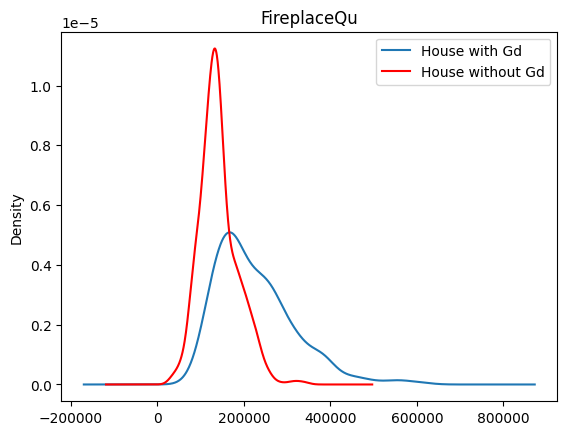

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=["House with Gd","House without Gd"]
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [ ]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu'].fillna('Gd',inplace=True)

/tmp/ipython-input-891419280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

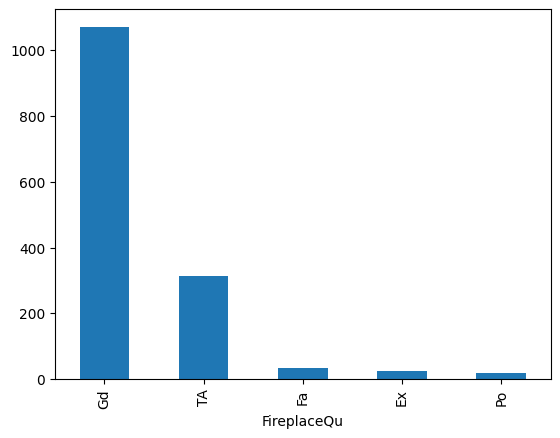

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

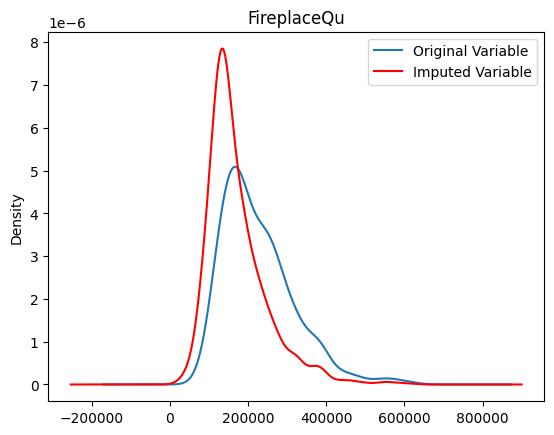

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=["Original Variable",'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
imputer.statistics_

array([1, 20, 'RL', 60.0, 9600, 'Pave', 'Pave', 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'NAmes', 'Norm', 'Norm', '1Fam', '1Story', 5, 5,
       2005, 1950, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'BrkFace',
       0.0, 'TA', 'TA', 'PConc', 'TA', 'TA', 'No', 'Unf', 0, 'Unf', 0, 0,
       0, 'GasA', 'Ex', 'Y', 'SBrkr', 864, 0, 0, 864, 0, 0, 2, 0, 3, 1,
       'TA', 6, 'Typ', 0, 'Gd', 'Attchd', 2005.0, 'Unf', 2, 0, 'TA', 'TA',
       'Y', 0, 0, 0, 0, 0, 0, 'Gd', 'MnPrv', 'Shed', 0, 6, 2009, 'WD',
       'Normal'], dtype=object)

#Another Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='missing')

X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [ ]:
imputer.statistics_

array(['missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing', 'missing', 'missing', 'missing', 'missing',
       'missing', 'missing'], dtype=object)